# Import Required Libararies -1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset in python-2

In [3]:
data=pd.read_csv("Telco-Customer-Churn.csv")

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
pd.set_option('display.max_columns',21)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Verify your dataset-3

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
pd.to_numeric(data.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [9]:
data.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [10]:
 # introduce NaN (Not a Number) where ever there is error in parsing

In [11]:
pd.to_numeric(data.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [12]:
data.TotalCharges = pd.to_numeric(data.TotalCharges,errors='coerce')

In [13]:
data.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              NaN
Churn                                      No
Name: 488, dtype: object

# Extracting Features and Target-4

In [14]:
x=data.iloc[:,1:20]
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [16]:
y=data.Churn
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

# Splitting data into training and testing dataset-5

# from sklearn.model_selection import train_test_split

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.85,random_state=4892)

In [21]:
xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5023,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.30,70.30
2614,Female,0,Yes,Yes,67,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,Yes,One year,Yes,Credit card (automatic),94.35,6341.45
6823,Female,0,No,No,4,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),50.55,235.65
1881,Male,0,No,No,26,No,No phone service,DSL,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),44.65,1156.55
5488,Male,1,Yes,No,45,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,No,One year,Yes,Bank transfer (automatic),98.70,4525.80


In [22]:
ytrain.head()

5023    Yes
2614    Yes
6823     No
1881     No
5488     No
Name: Churn, dtype: object

In [23]:
xtest.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2721,Male,1,No,No,10,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.25,793.55
6255,Male,1,Yes,No,69,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,110.55,7610.10
886,Female,1,No,No,7,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,84.35,609.65
3412,Male,0,Yes,Yes,2,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Mailed check,59.50,130.50
6499,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.30,20.30


In [24]:
ytest.head()

2721    Yes
6255     No
886      No
3412     No
6499     No
Name: Churn, dtype: object

# Data Cleaning -6


# 1.Missing Value Treatment

In [25]:
xtrain.isnull()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5023,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2614,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6823,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1881,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5488,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2520,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2165,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2766,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
data.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              NaN
Churn                                      No
Name: 488, dtype: object

In [27]:
#visualizing missing values across the data frame


<Axes: >

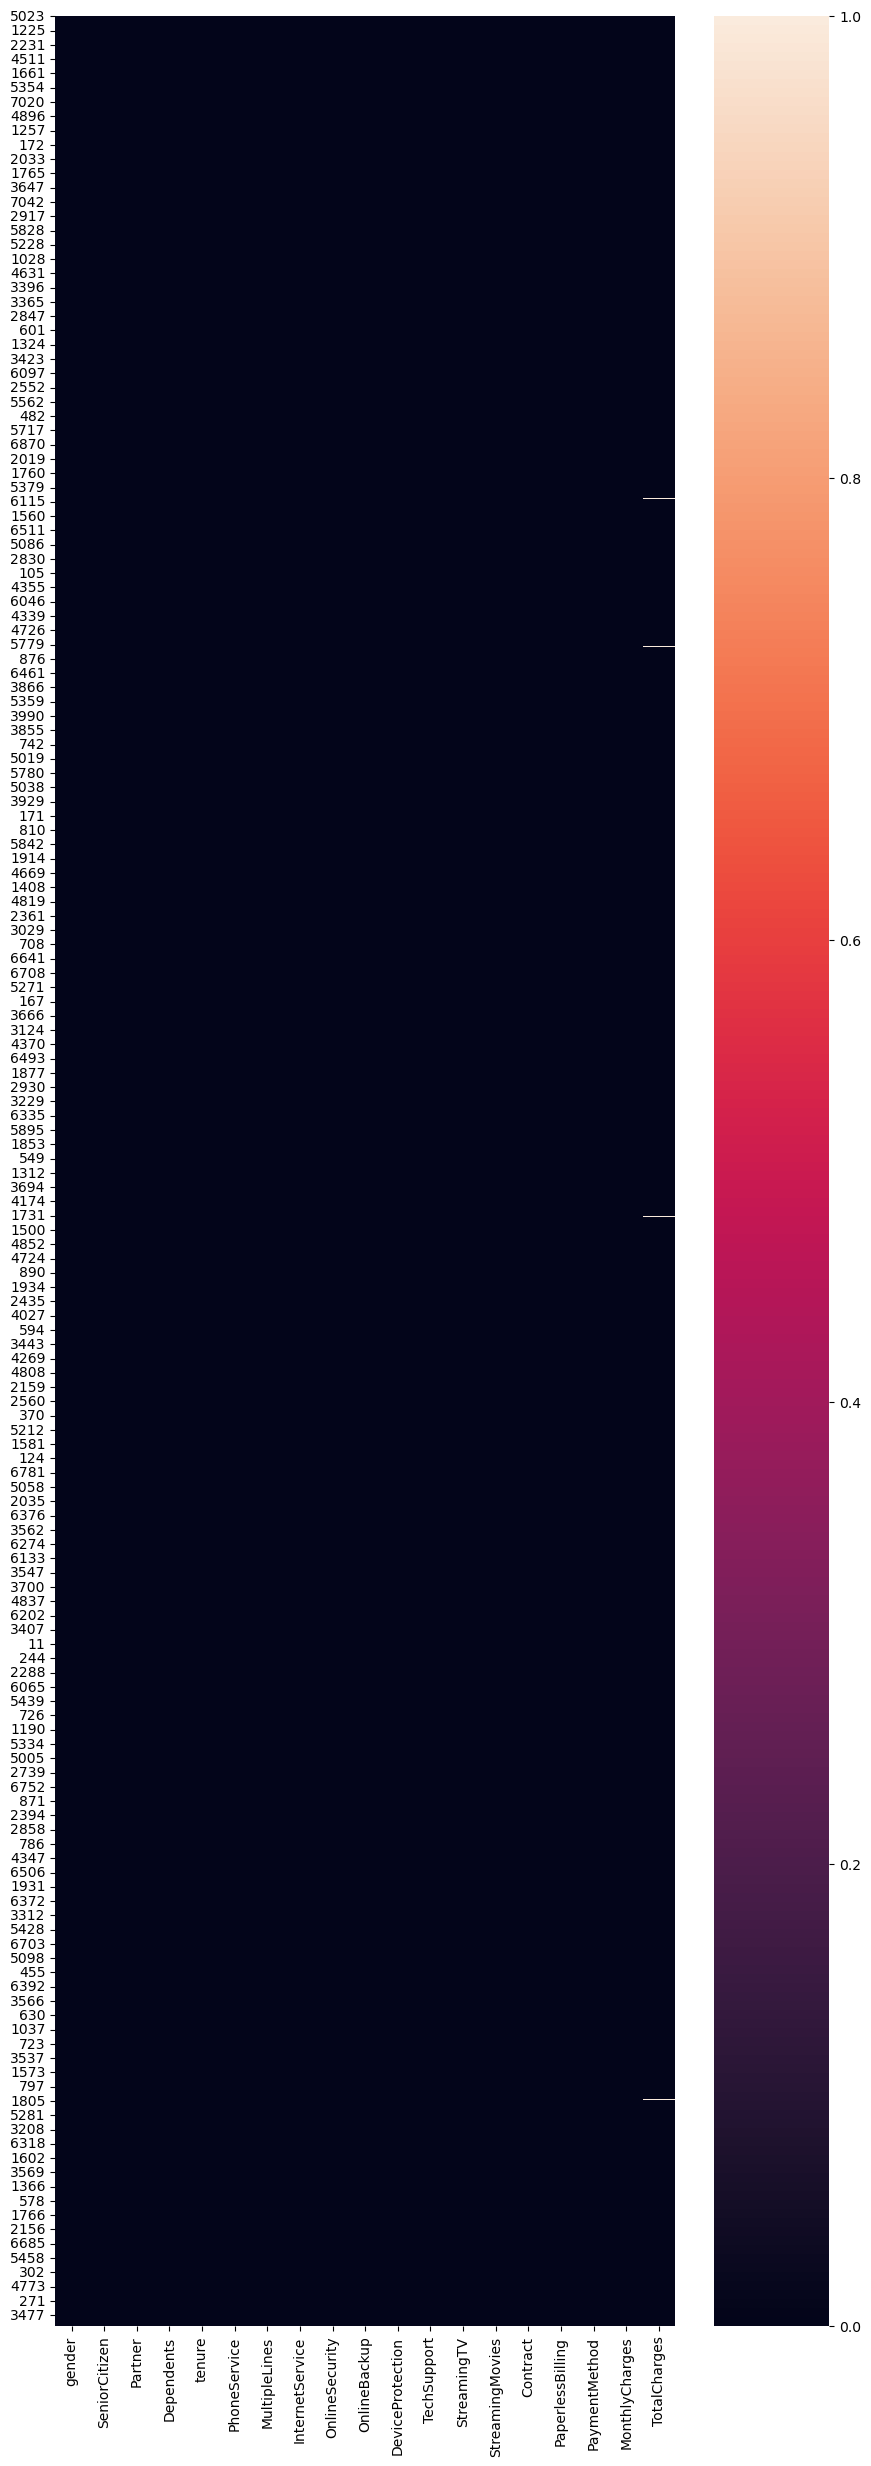

In [29]:
plt.figure(figsize=(10,30))
sns.heatmap(xtrain.isnull())

In [30]:
xtrain.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64

In [34]:
round(xtrain.isnull().sum()*100 / xtrain.shape[0],2)

gender              0.00
SeniorCitizen       0.00
Partner             0.00
Dependents          0.00
tenure              0.00
PhoneService        0.00
MultipleLines       0.00
InternetService     0.00
OnlineSecurity      0.00
OnlineBackup        0.00
DeviceProtection    0.00
TechSupport         0.00
StreamingTV         0.00
StreamingMovies     0.00
Contract            0.00
PaperlessBilling    0.00
PaymentMethod       0.00
MonthlyCharges      0.00
TotalCharges        0.18
dtype: float64

In [35]:
xtrain.TotalCharges = xtrain.TotalCharges.fillna(xtrain.TotalCharges.mean())

In [39]:
xtrain.loc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                      2297.254552
Name: 488, dtype: object

In [40]:
data.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              NaN
Churn                                      No
Name: 488, dtype: object

In [42]:
xtrain.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [43]:
xtest.isnull().sum()  # if missing values in testing, then replace with the TRAINING DATA Mean/Median/Mode

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

# Outlier Treatment¶ 

<Axes: >

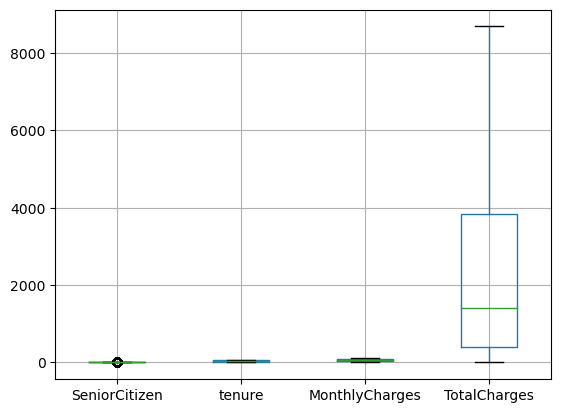

In [45]:
xtrain.boxplot()

In [46]:
xtrain.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,0.161042,32.395256,65.005471,2297.254552
std,0.367601,24.596584,30.102234,2276.281813
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.925000,404.237500
50%,0.000000,29.000000,70.450000,1414.725000
75%,0.000000,56.000000,90.050000,3832.775000
max,1.000000,72.000000,118.750000,8684.800000


<Axes: >

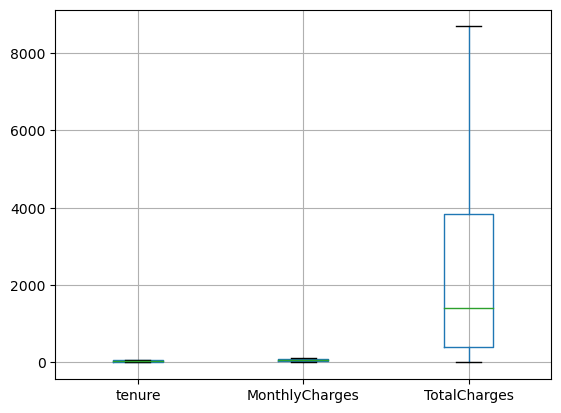

In [47]:
xtrain.boxplot(['tenure','MonthlyCharges','TotalCharges'])

# Loading another dataset for outlier analysis only

In [49]:
out_df = pd.read_csv('winequality.csv')
out_df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [51]:
out_df = pd.read_csv('winequality.csv',sep=';')
out_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<Axes: >

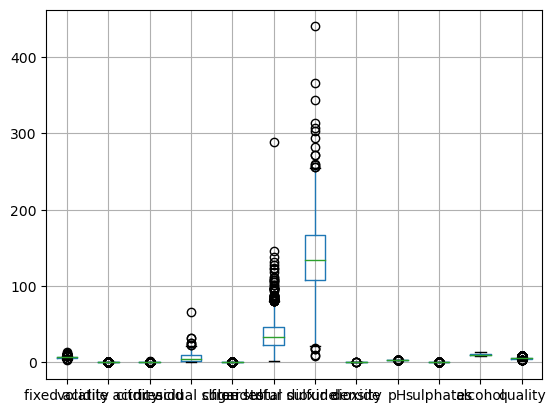

In [52]:
out_df.boxplot()

<Axes: >

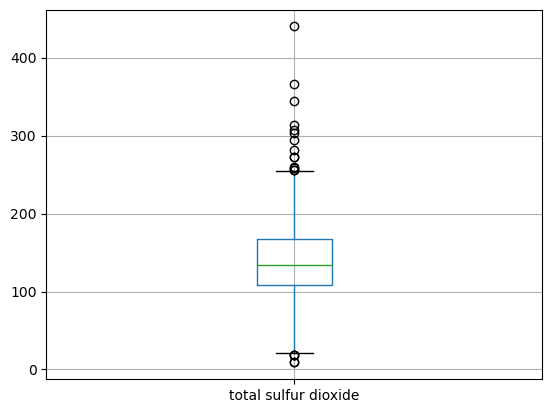

In [53]:
out_df.boxplot(['total sulfur dioxide'])

In [54]:
out_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [55]:
Q1 = out_df['total sulfur dioxide'].quantile(0.25)
Q3 = out_df['total sulfur dioxide'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - 1.5 * IQR
UL = Q3 + 1.5 * IQR

print(f'Q1: {Q1} | Q3: {Q3} | IQR: {IQR} | LL: {LL} | UL: {UL}')

Q1: 108.0 | Q3: 167.0 | IQR: 59.0 | LL: 19.5 | UL: 255.5


In [56]:
ul_outlier_count = out_df[out_df['total sulfur dioxide'] > UL].shape[0]
ll_outlier_count = out_df[out_df['total sulfur dioxide'] < LL].shape[0]

total_outliers = ul_outlier_count + ll_outlier_count

perc_outliers = total_outliers * 100 / out_df.shape[0]

print(f'UL Outlier Count: {ul_outlier_count} | LL Outlier Count: {ll_outlier_count} | Total Outlier Count: {total_outliers} | Outlier%: {perc_outliers}')

UL Outlier Count: 14 | LL Outlier Count: 5 | Total Outlier Count: 19 | Outlier%: 0.38791343405471623


In [57]:
# my outliers are <=5%, hence replacing them with the corresponding limits
out_df.loc[out_df['total sulfur dioxide'] > UL] = UL
out_df.loc[out_df['total sulfur dioxide'] < LL] = LL

<Axes: >

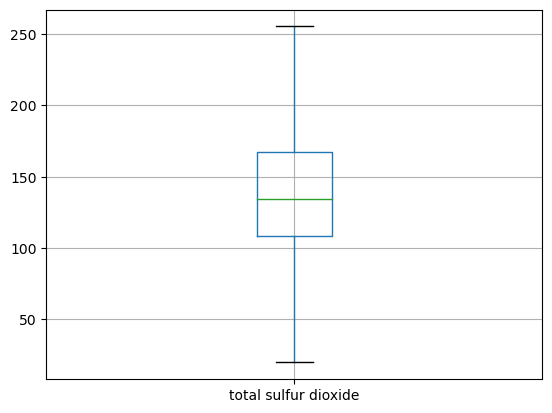

In [58]:
out_df.boxplot(['total sulfur dioxide'])

# EDA - Exploratory Data Analysis-7


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


C:\Users\91702\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


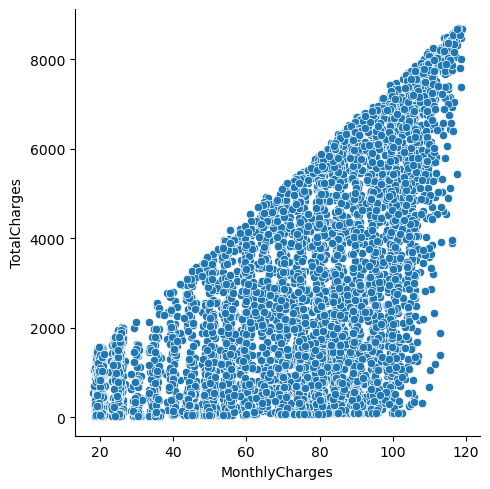

In [61]:
sns.relplot(x='MonthlyCharges',y='TotalCharges',data=data)
# can see no relationship between the 2 cols, data is spreaded across

C:\Users\91702\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


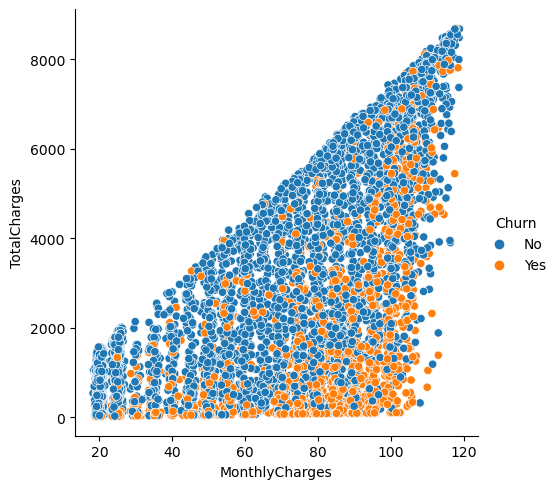

In [62]:
sns.relplot(x='MonthlyCharges',y='TotalCharges',hue='Churn',data=data)
# trying to find out the churn behaviour
# since the churned customers are all over the place coloring it is getting hard to analyse, hence we can split it

C:\Users\91702\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


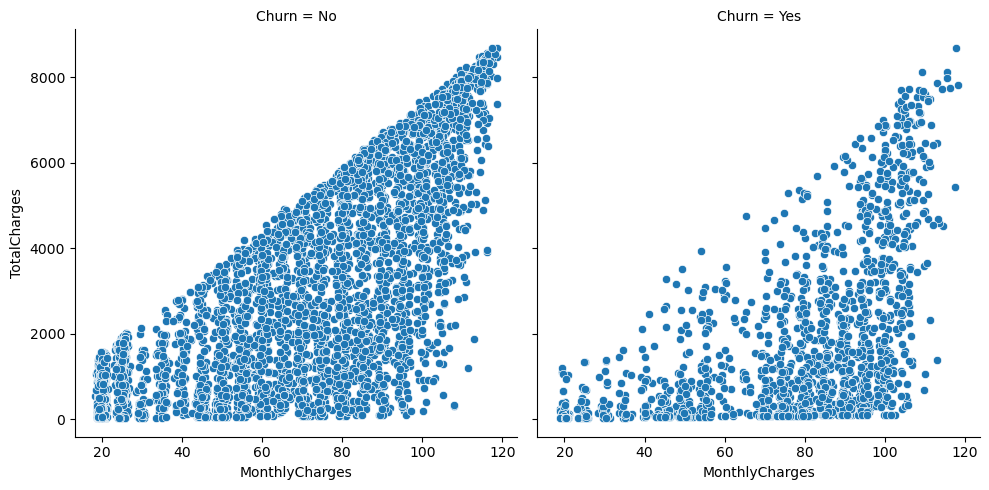

In [63]:
sns.relplot(x='MonthlyCharges',y='TotalCharges',col='Churn',data=data)

C:\Users\91702\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


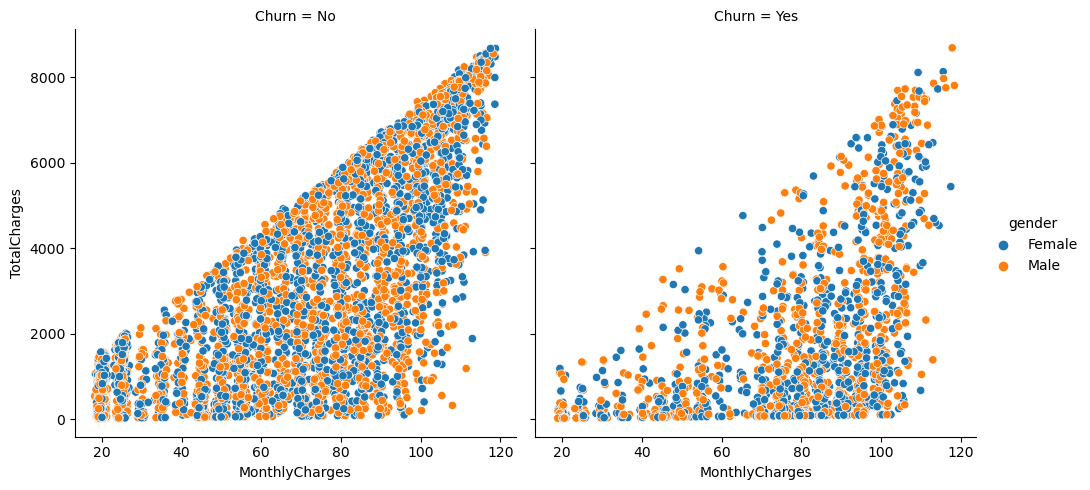

In [64]:
# %matplotlib inline
sns.relplot(x='MonthlyCharges',y='TotalCharges',col='Churn',hue='gender',data=data)
# plt.show()

# Correlation Analysis

In [65]:
xtrain[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.252588,0.826637
MonthlyCharges,0.252588,1.000000,0.651293
TotalCharges,0.826637,0.651293,1.000000


<Axes: >

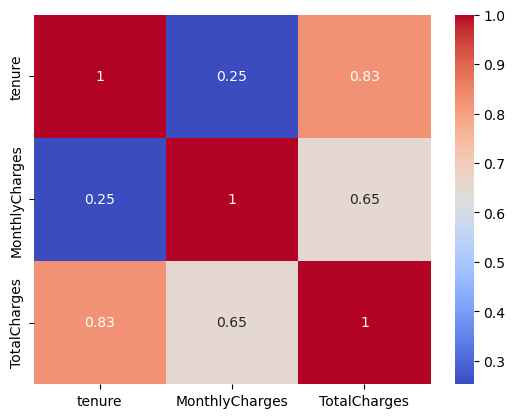

In [67]:
sns.heatmap(xtrain[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(),cmap='coolwarm',annot=True)

In [68]:
xtrain = xtrain.drop(['TotalCharges'],axis=1)
xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
5023,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.30
2614,Female,0,Yes,Yes,67,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,Yes,One year,Yes,Credit card (automatic),94.35
6823,Female,0,No,No,4,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),50.55
1881,Male,0,No,No,26,No,No phone service,DSL,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),44.65
5488,Male,1,Yes,No,45,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,No,One year,Yes,Bank transfer (automatic),98.70


In [69]:
xtest = xtest.drop(['TotalCharges'],axis=1)
xtest.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
2721,Male,1,No,No,10,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.25
6255,Male,1,Yes,No,69,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,110.55
886,Female,1,No,No,7,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,84.35
3412,Male,0,Yes,Yes,2,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Mailed check,59.50
6499,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.30


# Feature Scaling-8


# Standard Scaler

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
std=StandardScaler()

In [74]:
xtrain[['tenure','MonthlyCharges']].head()

,tenure,MonthlyCharges
5023,1,70.30
2614,67,94.35
6823,4,50.55
1881,26,44.65
5488,45,98.70


In [75]:
std.fit_transform(xtrain[['tenure','MonthlyCharges']])  # training data

array([[-1.27651377,  0.17589961],
       [ 1.40700981,  0.97491038],
       [-1.15453542, -0.48025268],
       ...,
       [-0.78860039, -1.48856773],
       [ 1.28503147,  1.66096328],
       [-1.03255708, -1.52012948]])

In [76]:
xtest[['tenure','MonthlyCharges']].head()

,tenure,MonthlyCharges
2721,10,79.25
6255,69,110.55
886,7,84.35
3412,2,59.50
6499,1,20.30


In [77]:
std.transform(xtest[['tenure','MonthlyCharges']])

array([[-0.91057874,  0.47324457],
       [ 1.48832871,  1.51312137],
       [-1.03255708,  0.64268137],
       ...,
       [-0.42266536, -1.49687345],
       [-1.15453542, -0.47028581],
       [-1.03255708, -1.01348024]])

# MinMax Scalar

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
m2s = MinMaxScaler()

In [80]:
m2s.fit_transform(xtrain[['tenure','MonthlyCharges']])

array([[0.01388889, 0.51791045],
       [0.93055556, 0.75721393],
       [0.05555556, 0.32139303],
       ...,
       [0.18055556, 0.01940299],
       [0.88888889, 0.96268657],
       [0.09722222, 0.00995025]])

In [81]:
xtest[['tenure','MonthlyCharges']].head()

,tenure,MonthlyCharges
2721,10,79.25
6255,69,110.55
886,7,84.35
3412,2,59.50
6499,1,20.30


In [82]:
m2s.transform(xtest[['tenure','MonthlyCharges']])

array([[0.13888889, 0.60696517],
       [0.95833333, 0.91840796],
       [0.09722222, 0.65771144],
       ...,
       [0.30555556, 0.01691542],
       [0.05555556, 0.32437811],
       [0.09722222, 0.16169154]])

# Replacing the original columns in dataset

In [83]:
xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
5023,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.30
2614,Female,0,Yes,Yes,67,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,Yes,One year,Yes,Credit card (automatic),94.35
6823,Female,0,No,No,4,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),50.55
1881,Male,0,No,No,26,No,No phone service,DSL,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),44.65
5488,Male,1,Yes,No,45,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,No,One year,Yes,Bank transfer (automatic),98.70


In [84]:
xtrain.tenure = m2s.fit_transform(xtrain[['tenure']])
xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
5023,Female,0,No,No,0.013889,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.30
2614,Female,0,Yes,Yes,0.930556,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,Yes,One year,Yes,Credit card (automatic),94.35
6823,Female,0,No,No,0.055556,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),50.55
1881,Male,0,No,No,0.361111,No,No phone service,DSL,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),44.65
5488,Male,1,Yes,No,0.625000,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,No,One year,Yes,Bank transfer (automatic),98.70


In [85]:
xtest.tenure = m2s.transform(xtest[['tenure']])
xtest.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
2721,Male,1,No,No,0.138889,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.25
6255,Male,1,Yes,No,0.958333,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,110.55
886,Female,1,No,No,0.097222,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,84.35
3412,Male,0,Yes,Yes,0.027778,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Mailed check,59.50
6499,Male,0,No,No,0.013889,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.30


In [86]:
xtrain.MonthlyCharges = m2s.fit_transform(xtrain[['MonthlyCharges']])
xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
5023,Female,0,No,No,0.013889,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.517910
2614,Female,0,Yes,Yes,0.930556,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,Yes,One year,Yes,Credit card (automatic),0.757214
6823,Female,0,No,No,0.055556,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0.321393
1881,Male,0,No,No,0.361111,No,No phone service,DSL,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),0.262687
5488,Male,1,Yes,No,0.625000,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0.800498


In [87]:
xtest.MonthlyCharges = m2s.transform(xtest[['MonthlyCharges']])
xtest.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
2721,Male,1,No,No,0.138889,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,0.606965
6255,Male,1,Yes,No,0.958333,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0.918408
886,Female,1,No,No,0.097222,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,0.657711
3412,Male,0,Yes,Yes,0.027778,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Mailed check,0.410448
6499,Male,0,No,No,0.013889,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0.020398


# Data Encoding -9

In [88]:
ytrain.head()

5023    Yes
2614    Yes
6823     No
1881     No
5488     No
Name: Churn, dtype: object

In [89]:
from sklearn.preprocessing import LabelEncoder

In [90]:
le = LabelEncoder()

In [91]:
le.fit_transform(ytrain)  
# fit part is finding the unique categories and sorting them alphabetically, 
# transform is replacing the categories with numbers

array([1, 1, 0, ..., 0, 0, 1])

In [92]:
ytrain = le.fit_transform(ytrain)  
ytrain

array([1, 1, 0, ..., 0, 0, 1])

In [93]:
ytest = le.transform(ytest)
ytest

array([1, 0, 0, ..., 0, 1, 1])

In [94]:
xtrain['Is_Female'] = pd.get_dummies(xtrain.gender).astype('int')['Female']
del xtrain['gender']
xtrain.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Is_Female
5023,0,No,No,0.013889,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.517910,1
2614,0,Yes,Yes,0.930556,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,Yes,One year,Yes,Credit card (automatic),0.757214,1
6823,0,No,No,0.055556,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0.321393,1
1881,0,No,No,0.361111,No,No phone service,DSL,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),0.262687,0
5488,1,Yes,No,0.625000,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0.800498,0


In [96]:
xtrain['Partner'].value_counts()

Partner
No     3105
Yes    2881
Name: count, dtype: int64

In [97]:
pd.get_dummies(xtrain.Partner).astype('int')

,No,Yes
5023,1,0
2614,0,1
6823,1,0
1881,1,0
5488,0,1
...,...,...
3865,1,0
2520,0,1
2165,1,0
2766,0,1


In [99]:
xtrain['Has_Partner'] = pd.get_dummies(xtrain.Partner).astype('int')['Yes']
del xtrain['Partner']
xtrain.head()

,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Is_Female,Has_Partner
5023,0,No,0.013889,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.517910,1,0
2614,0,Yes,0.930556,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,Yes,One year,Yes,Credit card (automatic),0.757214,1,1
6823,0,No,0.055556,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0.321393,1,0
1881,0,No,0.361111,No,No phone service,DSL,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),0.262687,0,0
5488,1,No,0.625000,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0.800498,0,1


In [100]:
xtrain['Dependents'].value_counts()

Dependents
No     4188
Yes    1798
Name: count, dtype: int64

In [101]:
xtrain['Has_Dependents'] = pd.get_dummies(xtrain.Dependents).astype('int')['Yes']
del xtrain['Dependents']
xtrain.head()

,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Is_Female,Has_Partner,Has_Dependents
5023,0,0.013889,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.517910,1,0,0
2614,0,0.930556,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,Yes,One year,Yes,Credit card (automatic),0.757214,1,1,1
6823,0,0.055556,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0.321393,1,0,0
1881,0,0.361111,No,No phone service,DSL,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),0.262687,0,0,0
5488,1,0.625000,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0.800498,0,1,0


In [102]:
xtrain['Has_PhoneService'] = pd.get_dummies(xtrain.PhoneService).astype('int')['Yes']
del xtrain['PhoneService']
xtrain.head()

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Is_Female,Has_Partner,Has_Dependents,Has_PhoneService
5023,0,0.013889,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.517910,1,0,0,1
2614,0,0.930556,Yes,Fiber optic,Yes,No,No,Yes,No,Yes,One year,Yes,Credit card (automatic),0.757214,1,1,1,1
6823,0,0.055556,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0.321393,1,0,0,1
1881,0,0.361111,No phone service,DSL,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),0.262687,0,0,0,0
5488,1,0.625000,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0.800498,0,1,0,1


In [103]:
xtrain['Has_MultipleLines'] = xtrain['MultipleLines'].map({'Yes':1,'No':0,'No phone service':0})
del xtrain['MultipleLines']
xtrain.head()

,SeniorCitizen,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Is_Female,Has_Partner,Has_Dependents,Has_PhoneService,Has_MultipleLines
5023,0,0.013889,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.517910,1,0,0,1,0
2614,0,0.930556,Fiber optic,Yes,No,No,Yes,No,Yes,One year,Yes,Credit card (automatic),0.757214,1,1,1,1,1
6823,0,0.055556,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0.321393,1,0,0,1,0
1881,0,0.361111,DSL,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),0.262687,0,0,0,0,0
5488,1,0.625000,Fiber optic,No,Yes,Yes,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0.800498,0,1,0,1,1


In [104]:
xtrain['Has_OnlineSecurity'] = xtrain['OnlineSecurity'].map({'Yes':1,'No':0,'No internet service':0})
del xtrain['OnlineSecurity']
xtrain['Has_OnlineBackup'] = xtrain['OnlineBackup'].map({'Yes':1,'No':0,'No internet service':0})
del xtrain['OnlineBackup']
xtrain['Has_DeviceProtection'] = xtrain['DeviceProtection'].map({'Yes':1,'No':0,'No internet service':0})
del xtrain['DeviceProtection']
xtrain['Has_TechSupport'] = xtrain['TechSupport'].map({'Yes':1,'No':0,'No internet service':0})
del xtrain['TechSupport']
xtrain['Has_StreamingTV'] = xtrain['StreamingTV'].map({'Yes':1,'No':0,'No internet service':0})
del xtrain['StreamingTV']
xtrain['Has_StreamingMovies'] = xtrain['StreamingMovies'].map({'Yes':1,'No':0,'No internet service':0})
del xtrain['StreamingMovies']
xtrain.head()

,SeniorCitizen,tenure,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Is_Female,Has_Partner,Has_Dependents,Has_PhoneService,Has_MultipleLines,Has_OnlineSecurity,Has_OnlineBackup,Has_DeviceProtection,Has_TechSupport,Has_StreamingTV,Has_StreamingMovies
5023,0,0.013889,Fiber optic,Month-to-month,Yes,Electronic check,0.517910,1,0,0,1,0,0,0,0,0,0,0
2614,0,0.930556,Fiber optic,One year,Yes,Credit card (automatic),0.757214,1,1,1,1,1,1,0,0,1,0,1
6823,0,0.055556,DSL,Month-to-month,Yes,Bank transfer (automatic),0.321393,1,0,0,1,0,1,0,0,0,0,0
1881,0,0.361111,DSL,Month-to-month,Yes,Bank transfer (automatic),0.262687,0,0,0,0,0,1,1,0,0,0,1
5488,1,0.625000,Fiber optic,One year,Yes,Bank transfer (automatic),0.800498,0,1,0,1,1,0,1,1,1,1,0


In [105]:
xtrain['Contract'].value_counts()

Contract
Month-to-month    3303
Two year          1438
One year          1245
Name: count, dtype: int64

In [106]:
xtrain['Contract'] = le.fit_transform(xtrain['Contract'])  
xtrain.head()

,SeniorCitizen,tenure,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Is_Female,Has_Partner,Has_Dependents,Has_PhoneService,Has_MultipleLines,Has_OnlineSecurity,Has_OnlineBackup,Has_DeviceProtection,Has_TechSupport,Has_StreamingTV,Has_StreamingMovies
5023,0,0.013889,Fiber optic,0,Yes,Electronic check,0.517910,1,0,0,1,0,0,0,0,0,0,0
2614,0,0.930556,Fiber optic,1,Yes,Credit card (automatic),0.757214,1,1,1,1,1,1,0,0,1,0,1
6823,0,0.055556,DSL,0,Yes,Bank transfer (automatic),0.321393,1,0,0,1,0,1,0,0,0,0,0
1881,0,0.361111,DSL,0,Yes,Bank transfer (automatic),0.262687,0,0,0,0,0,1,1,0,0,0,1
5488,1,0.625000,Fiber optic,1,Yes,Bank transfer (automatic),0.800498,0,1,0,1,1,0,1,1,1,1,0


In [107]:
xtrain['Has_PaperlessBilling'] = pd.get_dummies(xtrain.PaperlessBilling).astype('int')['Yes']
del xtrain['PaperlessBilling']
xtrain.head()

,SeniorCitizen,tenure,InternetService,Contract,PaymentMethod,MonthlyCharges,Is_Female,Has_Partner,Has_Dependents,Has_PhoneService,Has_MultipleLines,Has_OnlineSecurity,Has_OnlineBackup,Has_DeviceProtection,Has_TechSupport,Has_StreamingTV,Has_StreamingMovies,Has_PaperlessBilling
5023,0,0.013889,Fiber optic,0,Electronic check,0.517910,1,0,0,1,0,0,0,0,0,0,0,1
2614,0,0.930556,Fiber optic,1,Credit card (automatic),0.757214,1,1,1,1,1,1,0,0,1,0,1,1
6823,0,0.055556,DSL,0,Bank transfer (automatic),0.321393,1,0,0,1,0,1,0,0,0,0,0,1
1881,0,0.361111,DSL,0,Bank transfer (automatic),0.262687,0,0,0,0,0,1,1,0,0,0,1,1
5488,1,0.625000,Fiber optic,1,Bank transfer (automatic),0.800498,0,1,0,1,1,0,1,1,1,1,0,1


In [108]:
xtrain['Paid_using_Bank_Transfer'] = pd.get_dummies(xtrain.PaymentMethod).astype('int')['Bank transfer (automatic)']
xtrain['Paid_using_Credit_Card'] = pd.get_dummies(xtrain.PaymentMethod).astype('int')['Credit card (automatic)']
xtrain['Paid_using_Electronic_Check'] = pd.get_dummies(xtrain.PaymentMethod).astype('int')['Electronic check']
del xtrain['PaymentMethod']
xtrain.head()

,SeniorCitizen,tenure,InternetService,Contract,MonthlyCharges,Is_Female,Has_Partner,Has_Dependents,Has_PhoneService,Has_MultipleLines,Has_OnlineSecurity,Has_OnlineBackup,Has_DeviceProtection,Has_TechSupport,Has_StreamingTV,Has_StreamingMovies,Has_PaperlessBilling,Paid_using_Bank_Transfer,Paid_using_Credit_Card,Paid_using_Electronic_Check
5023,0,0.013889,Fiber optic,0,0.517910,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1
2614,0,0.930556,Fiber optic,1,0.757214,1,1,1,1,1,1,0,0,1,0,1,1,0,1,0
6823,0,0.055556,DSL,0,0.321393,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0
1881,0,0.361111,DSL,0,0.262687,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0
5488,1,0.625000,Fiber optic,1,0.800498,0,1,0,1,1,0,1,1,1,1,0,1,1,0,0


In [109]:
xtrain['InternetService'].value_counts()

InternetService
Fiber optic    2649
DSL            2053
No             1284
Name: count, dtype: int64

In [110]:
xtrain['InternetService_Encoded'] = xtrain['InternetService'].map({'DSL':1,'No':0,'Fiber optic':2})
del xtrain['InternetService']
xtrain.head()

,SeniorCitizen,tenure,Contract,MonthlyCharges,Is_Female,Has_Partner,Has_Dependents,Has_PhoneService,Has_MultipleLines,Has_OnlineSecurity,Has_OnlineBackup,Has_DeviceProtection,Has_TechSupport,Has_StreamingTV,Has_StreamingMovies,Has_PaperlessBilling,Paid_using_Bank_Transfer,Paid_using_Credit_Card,Paid_using_Electronic_Check,InternetService_Encoded
5023,0,0.013889,0,0.517910,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,2
2614,0,0.930556,1,0.757214,1,1,1,1,1,1,0,0,1,0,1,1,0,1,0,2
6823,0,0.055556,0,0.321393,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1
1881,0,0.361111,0,0.262687,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1
5488,1,0.625000,1,0.800498,0,1,0,1,1,0,1,1,1,1,0,1,1,0,0,2


In [ ]:
-0.31127812445 -